## 数据prepare

In [1]:
import pandas as pd

df = pd.read_csv("../data/course-8-data.csv", header=0)  # 加载数据集
df.head()  # 预览前 5 行数据

,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


可以看到，该数据集共有两个特征变量 X0 和 X1, 以及一个目标值 Y。其中，目标值 Y 只包含 0 和 1，也就是一个典型的 0-1 分类问题。我们尝试将该数据集绘制成图，看一看数据的分布情况。

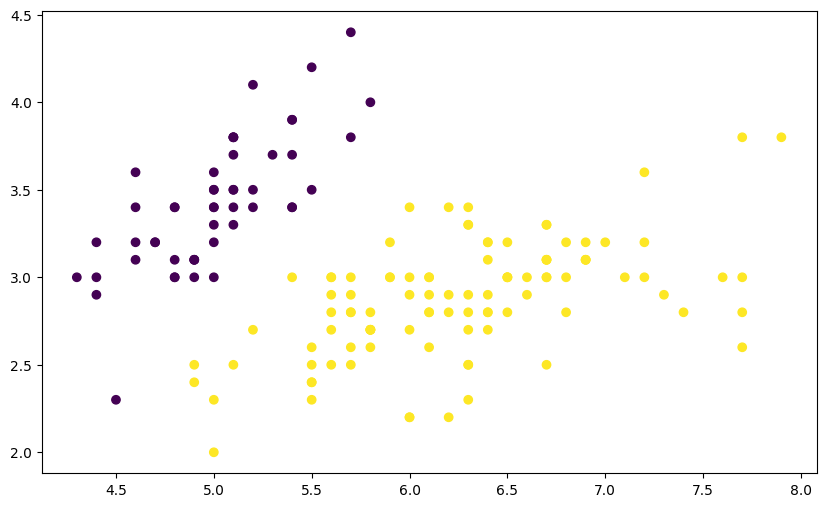

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(df['X0'], df['X1'], c=df['Y'])

## 算法实现
数据分为两类，接下来，就运用逻辑回归完成对两类数据的划分。

In [3]:
import numpy as np


def sigmoid(z):
    """sigmoid函数"""
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid


def loss(h, y):
    """损失函数"""
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss


def gradient(X, h, y):
    """计算梯度"""
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient


def Logistic_Regression(x, y, lr, num_iter):
    """逻辑回归过程(y=wx+b)"""
    # 初始化截距为 1
    intercept = np.ones((x.shape[0], 1))
    
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])   # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)       # 线性函数
        h = sigmoid(z)         # sigmoid 函数
        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g            # 通过学习率 lr 计算步长并执行梯度下降
        l = loss(h, y)         # 计算损失函数值

    return l, w                # 返回迭代后的梯度和参数

In [4]:
x = df[['X0', 'X1']].values
y = df['Y'].values
lr = 0.01         # 学习率
num_iter = 30000  # 迭代次数

# 训练
L = Logistic_Regression(x, y, lr, num_iter)
L

(0.05103697443193302, array([-1.47673791,  4.27250311, -6.9234085 ]))

## 结果展示
有了分类边界线函数，我们就可以将其绘制到原图中，看一看分类的效果到底如何。下面这段绘图代码涉及到 Matplotlib 绘制轮廓线，不需要掌握。

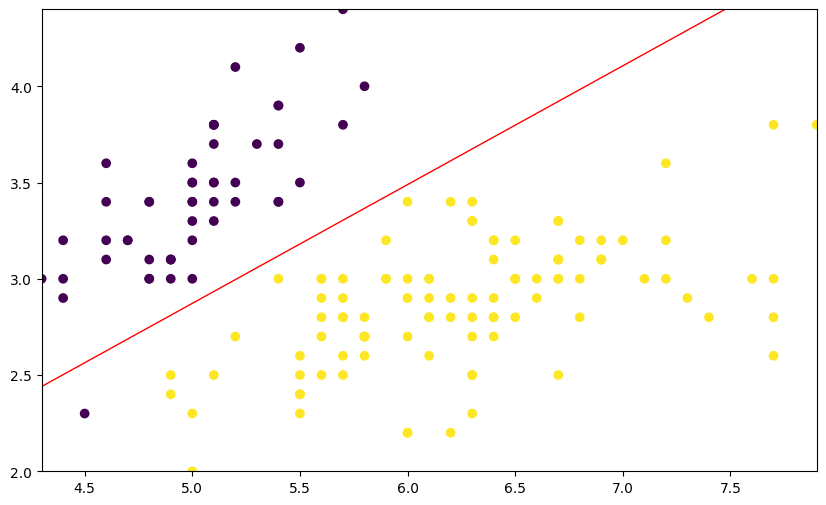

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X0'], df['X1'], c=df['Y'])

x1_min, x1_max = df['X0'].min(), df['X0'].max(),
x2_min, x2_max = df['X1'].min(), df['X1'].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
                       np.linspace(x2_min, x2_max))

grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[1][1:3]]).T) + L[1][0]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors='red')